# 1.2- EDAs - Test.csv

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## to change cientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("datasets/Test.csv")

In [3]:
df.head()

,ID,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,5788,Bk Usha behn,LIFESTYLE,10,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"January 14, 2018",1.0,4.1 and up
1,5789,Funny Ringtones,PERSONALIZATION,7146,14M,"1,000,000+",Free,0,Everyone 10+,Personalization,"February 2, 2018",1.1,4.0 and up
2,5790,Strava.cz,SHOPPING,2221,Varies with device,"100,000+",Free,0,Everyone,Shopping,"July 10, 2018",Varies with device,Varies with device
3,5791,BL Flowers Digital,SHOPPING,21,2.5M,100+,Free,0,Everyone,Shopping,"October 31, 2017",1.6,4.2 and up
4,5792,eCooltra: scooter sharing. Share electric scoo...,TRAVEL_AND_LOCAL,2822,27M,"100,000+",Free,0,Everyone,Travel & Local,"July 27, 2018",1.21.2,4.1 and up


In [4]:
df.shape

(1448, 13)

* ID = Unique Application Identifier 
* App = Name of the application
* Category = Application category 
* Reviews = Number of reviews of the application 
* Size = Size of the application 
* Installs = Number of downloads/installations on the computer
* Type = Free or Paid
* Price = Price of the application in dollars
* Content rating = Content rating
* Genres = Gender
* Last Updated = Last day to update 
* Current Ver = Current version of the application 
* Android View = Required Android Version
* Rating = Application Rating 

## EDAs content

1. Initial descriptions. Unique values on each categorical feature. Histograms, distributions of all columns
2. Correlation matrix with price (target var)
3. Plotting scatterplots

### 1. Initial descriptions. Unique values on each categorical feature. Histograms, distributions of all columns

In [5]:
## To see the data types
df.dtypes

ID                 int64
App               object
Category          object
Reviews            int64
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [6]:
## delete Id columns
df.drop('ID', axis=1, inplace=True)

In [7]:
## to get a data visual
df.describe()

,Reviews
count,1448.000
mean,170753.964
std,800106.692
min,0.000
25%,35.000
50%,1287.000
75%,34455.250
max,10979062.000


In [8]:
## to get a data visual
df.describe(include='object')

,App,Category,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448
unique,1448,33,229,20,2,29,4,83,585,709,26
top,What's Your CS:GO rank?,FAMILY,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,268,199,204,1339,1339,1168,116,44,174,337


In [9]:
## to explore nulls
df.isnull().sum()

App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Value counts graphs

This is usefull for low cardinal variables

In [10]:
def value_counts_graphs(column_name):
    label_freq = df[column_name].value_counts() / len(df)
    plotting = label_freq.sort_values(ascending=False).plot.bar()
    return label_freq, plotting   

(FAMILY                0.185
 GAME                  0.097
 TOOLS                 0.080
 PERSONALIZATION       0.047
 FINANCE               0.044
 PRODUCTIVITY          0.040
 BUSINESS              0.039
 LIFESTYLE             0.039
 MEDICAL               0.038
 HEALTH_AND_FITNESS    0.035
 SOCIAL                0.035
 SPORTS                0.032
 COMMUNICATION         0.030
 BOOKS_AND_REFERENCE   0.026
 SHOPPING              0.026
 NEWS_AND_MAGAZINES    0.026
 PHOTOGRAPHY           0.026
 VIDEO_PLAYERS         0.019
 DATING                0.019
 TRAVEL_AND_LOCAL      0.018
 ENTERTAINMENT         0.012
 FOOD_AND_DRINK        0.010
 MAPS_AND_NAVIGATION   0.010
 EDUCATION             0.010
 LIBRARIES_AND_DEMO    0.009
 WEATHER               0.008
 EVENTS                0.008
 HOUSE_AND_HOME        0.008
 AUTO_AND_VEHICLES     0.007
 ART_AND_DESIGN        0.006
 PARENTING             0.006
 BEAUTY                0.005
 COMICS                0.004
 Name: Category, dtype: float64,
 <AxesSubp

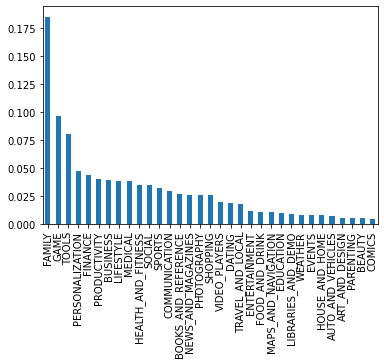

In [11]:
value_counts_graphs('Category')

(1,000,000+       0.141
 100,000+         0.116
 10,000+          0.114
 10,000,000+      0.106
 1,000+           0.090
 5,000,000+       0.071
 100+             0.069
 500,000+         0.052
 50,000+          0.046
 5,000+           0.045
 10+              0.034
 500+             0.032
 50,000,000+      0.024
 100,000,000+     0.019
 50+              0.019
 5+               0.010
 1+               0.008
 500,000,000+     0.002
 1,000,000,000+   0.001
 0+               0.001
 Name: Installs, dtype: float64,
 <AxesSubplot:>)

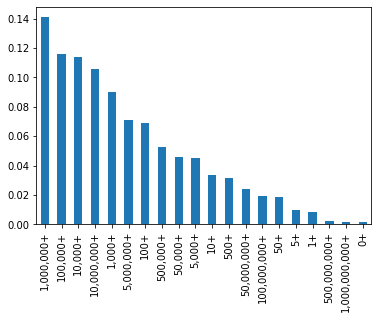

In [12]:
value_counts_graphs('Installs')

(Free   0.925
 Paid   0.075
 Name: Type, dtype: float64,
 <AxesSubplot:>)

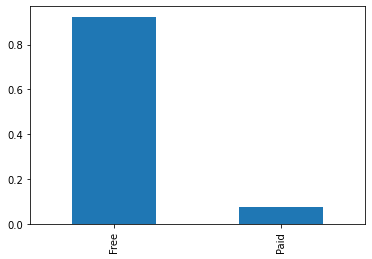

In [13]:
value_counts_graphs('Type')

(Everyone       0.807
 Teen           0.119
 Mature 17+     0.041
 Everyone 10+   0.033
 Name: Content Rating, dtype: float64,
 <AxesSubplot:>)

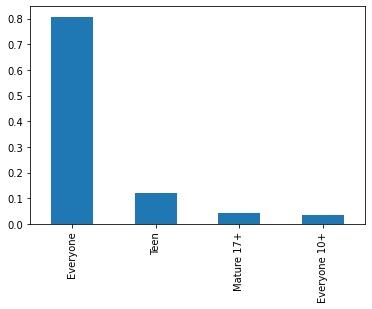

In [14]:
value_counts_graphs('Content Rating')

### Questions to Answer

If ratings are 0 and 1, and 1 == 5 and 0 othe ones and that and taking into account that this is the Ratings distribution: 

```
1   0.746
0   0.254
```

What characteristics the cero ratings has? and what characteristics do the 1 rating has?

* Which categories has more cero ratings and what more one ratings
* What number of reviews has cero ratings and one ratings
* What's the number of installs for zero ratings
* What type do the zero ratings has?
* What price do the zero ratings has?
* What content ratring do the zero ratings has?
* What genres do the zero ratings has?

### Groupings, pivot tables and ploting

This is usefull to see independent variables vs dependent variable.

In [15]:
df.columns

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [16]:
def groupby_var_target(df, column_name, target_name, title):
    ## group by
    groupby_var_target = df.groupby(
        column_name
    )[target_name].sum() / df.groupby(
        column_name
    )[target_name].count() * 100.0
    
    ## plot groupby
    ax = groupby_var_target.sort_values(ascending=False).plot(
        kind='bar',
        color='skyblue',
        grid=True,
        figsize=(10, 7),
        title=title
    )
    
    return groupby_var_target, plt.show()

In [17]:
## to get a data visual
df.describe()

,Reviews
count,1448.000
mean,170753.964
std,800106.692
min,0.000
25%,35.000
50%,1287.000
75%,34455.250
max,10979062.000


In [18]:
df['review_group'] = df['Reviews'].apply(
    lambda x: '[0, 23)' if x < 23 else '[23, 889)' if x < 889 \
        else '[889, 26432)' if x < 26432  \
        else '[26432+)'
)

In [19]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,review_group
0,Bk Usha behn,LIFESTYLE,10,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"January 14, 2018",1.0,4.1 and up,"[0, 23)"
1,Funny Ringtones,PERSONALIZATION,7146,14M,"1,000,000+",Free,0,Everyone 10+,Personalization,"February 2, 2018",1.1,4.0 and up,"[889, 26432)"
2,Strava.cz,SHOPPING,2221,Varies with device,"100,000+",Free,0,Everyone,Shopping,"July 10, 2018",Varies with device,Varies with device,"[889, 26432)"
3,BL Flowers Digital,SHOPPING,21,2.5M,100+,Free,0,Everyone,Shopping,"October 31, 2017",1.6,4.2 and up,"[0, 23)"
4,eCooltra: scooter sharing. Share electric scoo...,TRAVEL_AND_LOCAL,2822,27M,"100,000+",Free,0,Everyone,Travel & Local,"July 27, 2018",1.21.2,4.1 and up,"[889, 26432)"


In [20]:
def groupby_2_cols_against_target(df, column1, column2, target):

    groupby_2_cols_against_target = df.groupby(
        [column1, column2]
    )[target].sum() / df.groupby(
        [column1, column2]
    )[target].count() * 100.0

    pivot_t = groupby_2_cols_against_target.reset_index().pivot(
        index=column1,
        columns=column2,
        values=target
    )
    
    return pivot_t

In [21]:
df.columns

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'review_group'],
      dtype='object')

### Graph Outliers

<AxesSubplot:>

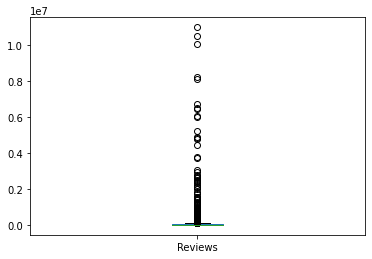

In [22]:
df.plot.box()

<AxesSubplot:>

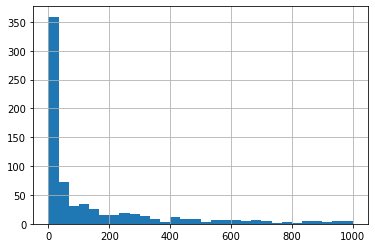

In [23]:
df['Reviews'].hist(bins=30, range=(0, 1000))

<AxesSubplot:>

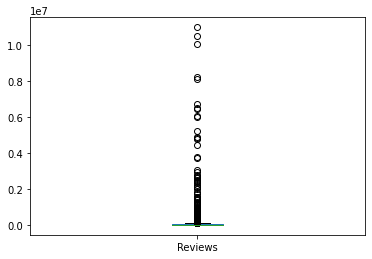

In [24]:
df['Reviews'].plot.box()

In [25]:
## to graph outliers

def graph_outliers(column_names):
    for column_name in column_names:
        plt.figure(figsize=(3,6))
        sns.boxplot(y=df[column_name])

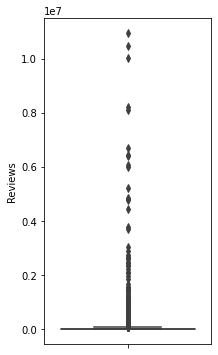

In [26]:
graph_outliers(['Reviews'])

array([[<AxesSubplot:title={'center':'Reviews'}>]], dtype=object)

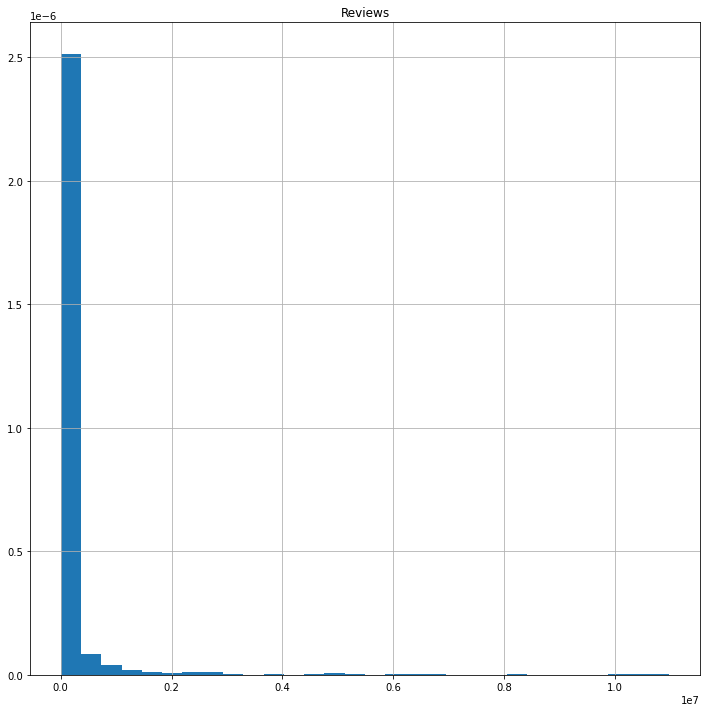

In [27]:
## to plot hist to all dataframe
df.hist(bins=30, figsize=(12,12), density=True)

### Correlation matrix with price (target var)

In [28]:
df.corr()

,Reviews
Reviews,1.000


,Reviews
Reviews,1.000


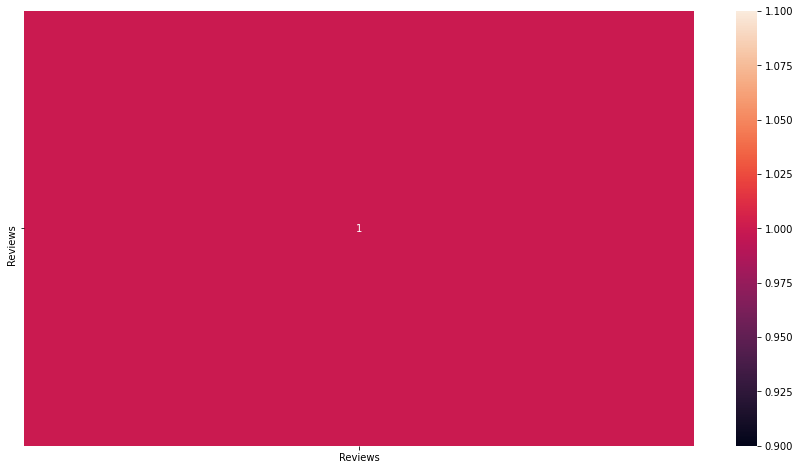

In [29]:
## confusion matriz with seaborn
corr = df.corr()
plt.figure(figsize=(15,8))

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

corr

In [30]:
## categorical correlation

cat_coor = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

In [31]:
cat_coor

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,review_group
App,1.000,0.033,0.660,0.144,0.001,0.033,0.081,0.018,0.090,0.411,0.480,0.088,0.046
Category,0.033,1.000,0.050,-0.050,-0.036,-0.037,-0.013,0.034,0.545,-0.029,0.033,-0.015,-0.005
Reviews,0.660,0.050,1.000,0.083,-0.015,-0.050,-0.039,0.058,0.149,0.186,0.467,0.024,0.437
Size,0.144,-0.050,0.083,1.000,-0.048,0.053,0.053,-0.021,0.061,0.185,0.188,0.126,-0.074
Installs,0.001,-0.036,-0.015,-0.048,1.000,-0.027,-0.032,0.055,-0.066,-0.074,-0.008,-0.045,0.180
Type,0.033,-0.037,-0.050,0.053,-0.027,1.000,0.747,-0.060,0.083,0.131,-0.026,0.120,-0.118
Price,0.081,-0.013,-0.039,0.053,-0.032,0.747,1.000,-0.036,0.025,0.161,-0.023,0.144,-0.098
Content Rating,0.018,0.034,0.058,-0.021,0.055,-0.060,-0.036,1.000,0.050,-0.064,0.001,-0.064,0.145
Genres,0.090,0.545,0.149,0.061,-0.066,0.083,0.025,0.050,1.000,0.077,0.062,-0.044,0.050
Last Updated,0.411,-0.029,0.186,0.185,-0.074,0.131,0.161,-0.064,0.077,1.000,0.092,0.124,-0.118


,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,review_group
App,1.000,-0.190,0.803,0.121,-0.247,-0.228,-0.189,-0.208,-0.114,0.511,0.689,-0.043,0.013
Category,-0.190,1.000,-0.118,-0.253,-0.192,-0.212,-0.226,-0.026,0.794,-0.233,-0.153,-0.236,-0.110
Reviews,0.803,-0.118,1.000,-0.036,-0.168,-0.435,-0.418,-0.063,-0.027,0.150,0.692,-0.192,0.517
Size,0.121,-0.253,-0.036,1.000,-0.267,-0.039,-0.043,-0.234,-0.132,0.252,0.178,0.140,-0.322
Installs,-0.247,-0.192,-0.168,-0.267,1.000,-0.214,-0.226,0.069,-0.291,-0.346,-0.188,-0.236,0.256
Type,-0.228,-0.212,-0.435,-0.039,-0.214,1.000,0.950,-0.300,-0.115,0.120,-0.347,0.142,-0.474
Price,-0.189,-0.226,-0.418,-0.043,-0.226,0.950,1.000,-0.287,-0.176,0.151,-0.339,0.166,-0.469
Content Rating,-0.208,-0.026,-0.063,-0.234,0.069,-0.300,-0.287,1.000,-0.057,-0.341,-0.168,-0.311,0.209
Genres,-0.114,0.794,-0.027,-0.132,-0.291,-0.115,-0.176,-0.057,1.000,-0.106,-0.125,-0.302,-0.095
Last Updated,0.511,-0.233,0.150,0.252,-0.346,0.120,0.151,-0.341,-0.106,1.000,0.091,0.130,-0.413


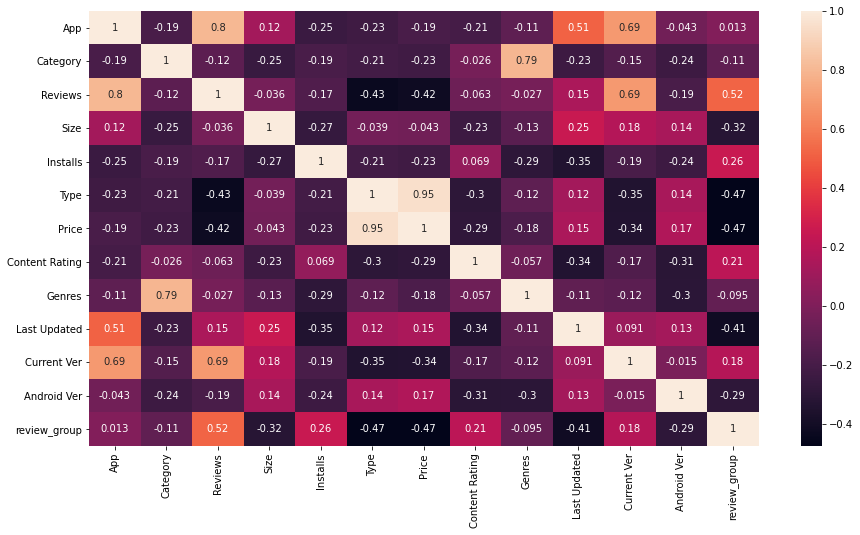

In [32]:
## confusion matriz with seaborn
corr = cat_coor.corr()
plt.figure(figsize=(15,8))

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

corr

### Plotting scatterplots with target

In [33]:
def scatter_plot_target(column_names, target):
    for column_name in column_names:
        plt.scatter(df[column_name], df[target])
        plt.show()

## Export Dataset

In [34]:
df.to_csv('datasets/TestDataAnalysis.csv', index=False)